In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
df = pd.read_csv('yellow_tripdata_2016-03.csv')

In [3]:
df = df.sample(n=20000, random_state=42)

# Save the new CSV file
df.to_csv('yellow_tripdata_2016-03_1.csv', index=False)

In [4]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
10557736,1,2016-03-27 15:08:52,2016-03-27 15:13:17,1,0.50,-73.984329,40.725151,1,N,-73.988426,40.718460,1,5.0,0.0,0.5,0.00,0.00,0.3,5.80
7714021,2,2016-03-23 11:51:00,2016-03-23 12:05:01,1,0.91,-73.994087,40.741070,1,N,-73.994453,40.750648,1,10.0,0.0,0.5,2.16,0.00,0.3,12.96
2577447,2,2016-03-06 20:37:43,2016-03-06 20:56:03,1,10.43,-73.874496,40.774109,1,N,-73.974083,40.753380,1,29.0,0.5,0.5,8.96,5.54,0.3,44.80
4438081,1,2016-03-15 12:08:22,2016-03-15 12:53:01,1,11.70,-73.872704,40.774269,1,N,-73.983513,40.750534,1,43.5,0.0,0.5,9.95,5.54,0.3,59.79
516516,1,2016-03-02 07:20:25,2016-03-02 07:26:12,1,1.30,-73.981735,40.740677,1,N,-73.974678,40.755955,1,6.5,0.0,0.5,2.00,0.00,0.3,9.30


In [5]:
# Data Preprocessing
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])
df['tpep_pickup_datetime_float'] = df['tpep_pickup_datetime'].apply(lambda x: x.timestamp())
df['tpep_dropoff_datetime_float'] = df['tpep_dropoff_datetime'].apply(lambda x: x.timestamp())

# Convert 'tpep_pickup_datetime' to numeric representation (Unix timestamp as integer)
df['tpep_pickup_numeric'] = df['tpep_pickup_datetime'].view('int64') // 10**9

# Convert 'tpep_dropoff_datetime' to numeric representation (Unix timestamp as integer)
df['tpep_dropoff_numeric'] = df['tpep_dropoff_datetime'].view('int64') // 10**9

df['day_of_week'] = df['tpep_pickup_datetime'].dt.dayofweek
df['hour_of_day'] = df['tpep_pickup_datetime'].dt.hour
df = df[(df['trip_distance'] > 0) & (df['passenger_count'] > 0)]


In [6]:
#df = df.sample(frac=0.25, random_state=42)
#df.head(5)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19889 entries, 10557736 to 4868631
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   VendorID                     19889 non-null  int64         
 1   tpep_pickup_datetime         19889 non-null  datetime64[ns]
 2   tpep_dropoff_datetime        19889 non-null  datetime64[ns]
 3   passenger_count              19889 non-null  int64         
 4   trip_distance                19889 non-null  float64       
 5   pickup_longitude             19889 non-null  float64       
 6   pickup_latitude              19889 non-null  float64       
 7   RatecodeID                   19889 non-null  int64         
 8   store_and_fwd_flag           19889 non-null  object        
 9   dropoff_longitude            19889 non-null  float64       
 10  dropoff_latitude             19889 non-null  float64       
 11  payment_type                 198

In [8]:
# Feature Selection
features = ['tpep_pickup_numeric','tpep_dropoff_numeric','passenger_count', 'trip_distance', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude']

In [9]:
from sklearn.cluster import KMeans

X = df[features]

# Perform K-Means clustering
k = 3  # Number of clusters
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X)

# Add cluster labels to the dataset
df['cluster'] = kmeans.labels_

# Analyze cab retention based on clusters
cluster_counts = df['cluster'].value_counts()
print(cluster_counts)

2    6776
1    6577
0    6536
Name: cluster, dtype: int64


In [10]:

# Get the cluster labels
cluster_labels = kmeans.labels_

# Get the cluster centroids
centroids = kmeans.cluster_centers_

# Convert the cluster centroids to a DataFrame for better visualization
centroids_df = pd.DataFrame(centroids, columns=['tpep_pickup_numeric','tpep_dropoff_numeric','passenger_count', 'trip_distance', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude'])

# Print the centroids DataFrame
print(centroids_df)


   tpep_pickup_numeric  tpep_dropoff_numeric  passenger_count  trip_distance  \
0         1.457229e+09          1.457230e+09         1.648247       2.872644   
1         1.459025e+09          1.459026e+09         1.665957       3.006567   
2         1.458111e+09          1.458112e+09         1.664551       3.009802   

   pickup_longitude  pickup_latitude  dropoff_longitude  dropoff_latitude  
0        -72.796817        40.103019         -72.909508         40.165627  
1        -72.939781        40.180940         -73.096459         40.268392  
2        -72.805480        40.106224         -72.947497         40.186111  


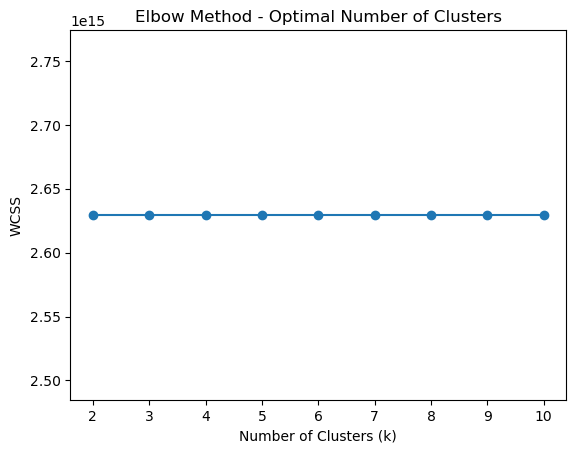

In [11]:

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Define the range of clusters to explore
min_clusters = 2
max_clusters = 10

# Perform K-Means clustering for different values of k
wcss = []
for k in range(min_clusters, max_clusters + 1):
    wcss.append(kmeans.inertia_)

# Plot the within-cluster sum of squares (WCSS) or distortion
plt.plot(range(min_clusters, max_clusters + 1), wcss, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method - Optimal Number of Clusters')
plt.show()

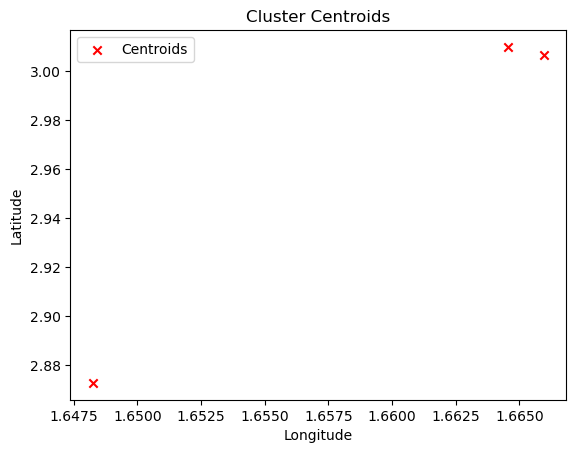

In [12]:

centroids = kmeans.cluster_centers_

# Plot the centroid coordinates as latitude and longitude
plt.scatter(centroids[:, 2], centroids[:, 3], c='red', marker='x', label='Centroids')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Cluster Centroids')
plt.legend()
plt.show()

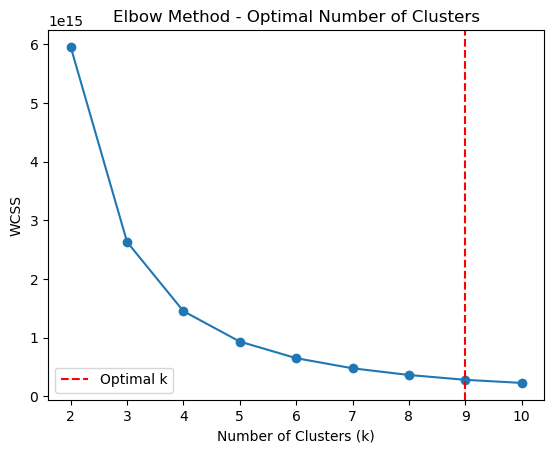

Optimal number of clusters (k): 9


In [13]:
# Define the range of clusters to explore
min_clusters = 2
max_clusters = 10

# Perform K-Means clustering for different values of k
wcss = []
for k in range(min_clusters, max_clusters + 1):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot the within-cluster sum of squares (WCSS) or distortion
plt.plot(range(min_clusters, max_clusters + 1), wcss, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method - Optimal Number of Clusters')

# Find the point of inflection (optimal number of clusters)
diff = [wcss[i] - wcss[i-1] for i in range(1, len(wcss))]
optimal_k = diff.index(max(diff)) + min_clusters

# Mark the optimal number of clusters on the plot
plt.axvline(x=optimal_k, color='r', linestyle='--', label='Optimal k')
plt.legend()

plt.show()

print(f"Optimal number of clusters (k): {optimal_k}")

In [14]:
from sklearn.cluster import KMeans

X = df[features]

# Perform K-Means clustering
k = 9 # Number of clusters
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X)

# Add cluster labels to the dataset
df['cluster'] = kmeans.labels_

# Analyze cab retention based on clusters
cluster_counts = df['cluster'].value_counts()
print(cluster_counts)

2    2512
8    2471
7    2460
0    2303
4    2082
6    2030
1    2023
5    2014
3    1994
Name: cluster, dtype: int64


In [15]:
# Get the cluster labels
cluster_labels = kmeans.labels_

# Get the cluster centroids
centroids = kmeans.cluster_centers_

# Convert the cluster centroids to a DataFrame for better visualization
centroids_df = pd.DataFrame(centroids, columns=['tpep_pickup_numeric','tpep_dropoff_numeric','passenger_count', 'trip_distance', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude'])

# Print the centroids DataFrame
centroids_df[["pickup_longitude","pickup_latitude"]]


,pickup_longitude,pickup_latitude
0,-73.008194,40.216711
1,-72.764713,40.086749
2,-72.767633,40.083596
3,-72.639812,40.017206
4,-72.978410,40.203777
5,-72.582808,39.984397
6,-72.917828,40.168269
7,-72.801718,40.103719
8,-73.105163,40.273754


In [16]:
import os
import sys
import pickle

projectabspathname = os.path.abspath('rentention using.pickle')
print(projectabspathname)
projectname = 'rentention using.ipynb'
projectpickle = open(str(projectabspathname),'wb')
pickle.dump(projectname, projectpickle)
projectpickle.close()

C:\Users\HP\rentention using.pickle
